# Relationship Between Non-Communicable Diseases, Obesity, and Nutrition in the Americas vs Europe

## Introduction

Non-communicable diseases (NCDs) are chronic diseases, which can be affected by diet, physical activity, weight, genetics, and other factors. Common NCDs include cardiovascular disease, chronic respiratory disease, cancer, and diabetes. The goal of my project is to observe the relationships between nutrition, obesity, and NCDs in the Americas (North and South) versus in Europe. I wanted to look at whether there was a relationship between implementation of a national awareness or public education campaign on nutrition and rates of non-communicable diseases across the Americas versus in Europe. I also wanted to see whether there was a relationship between implementation of nutrition programs and prevalence of obesity, which is a major risk factor for NCDs. To explore these relationships, I analyzed data from the World Health Organization's (WHO) Global Health Observatory, which attempted to gather global data on the implementation of nutrition programs in each of the WHO regions. To look at the burden of NCDs, I analyzed data from the World Bank's Health Nutrition and Population Statistics, which contains statistics from each region on the mortality rates (%) from NCDs for people aged 30 to 70 years old. Lastly, I analyzed obesity prevalence rates (%) among adults in each region from the WHO's Global Health Observatory.     

In [36]:
from requests import get

# data manipulation
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

## Data Collection Process

To gather data, I requested and made queries through the WHO and World Bank APIs. For the WHO and World Bank APIs, I found the indicators I wanted to analyze, such as nutrition, mortality, and obesity, and input them into the urls. I then used parameters that specified the specific region and dates that I wanted to look at. Lastly, I converted the resulting response into Pandas data frames. 

In [167]:
# WHO Nutrition Program Implementation Data
# make query to get data for Americas and Europe
nutrition_base_url = "https://ghoapi.azureedge.net/api/NCD_CCS_DIET_AWARE"
parameters = {"$filter": "ParentLocation eq 'Americas' or ParentLocation eq 'Europe'"} 

# get url with the specified parameters
nutrition_response = get(nutrition_base_url, params=parameters)
nutrition_response.status_code
nutrition_response.url 

# convert result into Pandas DataFrame
who_nutrition = nutrition_response.json()
who_nutrition_data = pd.DataFrame(who_nutrition['value']) 

# Structure of Data
pd.crosstab(who_nutrition_data.ParentLocation, who_nutrition_data.Value, normalize='index')

Value,Don't know,No,Yes
ParentLocation,,,
Americas,0.028571,0.400000,0.571429
Europe,0.018868,0.132075,0.849057


The pivot table above gives the proportion of countries in the Americas and Europe that have and don't have national nutrition education or awareness programs. For example, the proportion of countries in the Americas that do have nutrition programs is 0.57. 

In [166]:
# World Bank NCD Mortality Data
# make query to get data for Americas and Europe
wb_base_url = "https://api.worldbank.org/V2/country/NAC;LCN;ECS/indicator/SH.DYN.NCOM.ZS"
parameters = {"date": "2015", "format": "json"}

# get url with the specified parameters
wb_response = get(wb_base_url, params=parameters)
wb_response.status_code
wb_response.url

# clean up the data
clean_wb_data = wb_data.iloc[:,:-3]
column_names = ['indicator', 'country', 'country_code', 'year', 'mortality_rate']
clean_wb_data.columns = column_names

# Structure of Data
clean_wb_data.pivot_table(values = 'mortality_rate',index ='country_code')

,mortality_rate
country_code,
ECS,17.491056
LCN,15.432630
NAC,13.519505


The pivot table above gives the mortality rate (%) for each of the following regions: Europe and Central Asia (ECS), Latin America and the Caribbean (LCN), and North America (NAC).

In [165]:
# WHO Obesity Prevalence Data
# make query to get data for Americas and Europe
obesity_base_url = "https://ghoapi.azureedge.net/api/NCD_BMI_30A"
parameters = {"$filter": "ParentLocation eq 'Americas' or ParentLocation eq 'Europe'"} 

# get url with the specified parameters
obesity_response = get(obesity_base_url, params=parameters)
obesity_response.url

# convert result into Pandas DataFrame
who_obesity = obesity_response.json()
who_obesity_data = pd.DataFrame(who_obesity['value'])

# Structure of Data
who_obesity_data.pivot_table(values='NumericValue', index='ParentLocation')

,NumericValue
ParentLocation,
Americas,21.567739
Europe,17.633490


## Visualizing the Data

73.86363636363636

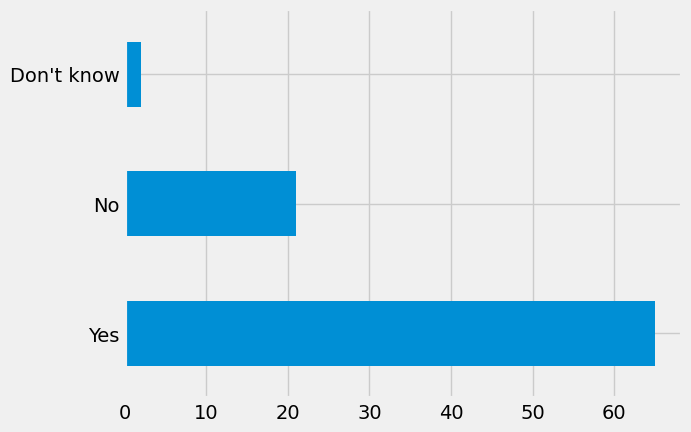

In [171]:
who_nutrition_data['Value'].value_counts().plot.barh()
65/(65+21+2) * 100

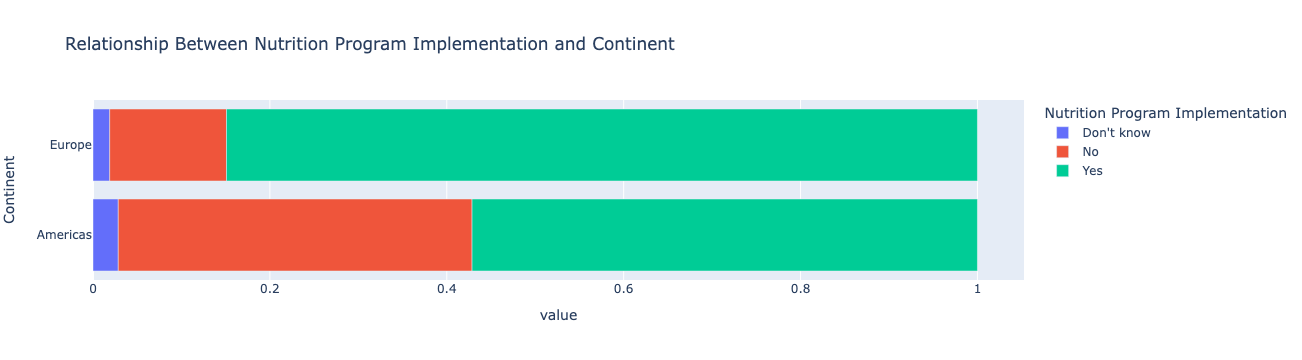

In [168]:
fig = px.bar(nutrition_and_location, x = nutrition_and_location.columns, y = nutrition_and_location.index, orientation = 'h',
             labels = {'ParentLocation': 'Continent',
                       'Value': 'Nutrition Program Implementation'},
             title='Relationship Between Nutrition Program Implementation and Continent'
            )
fig.show()

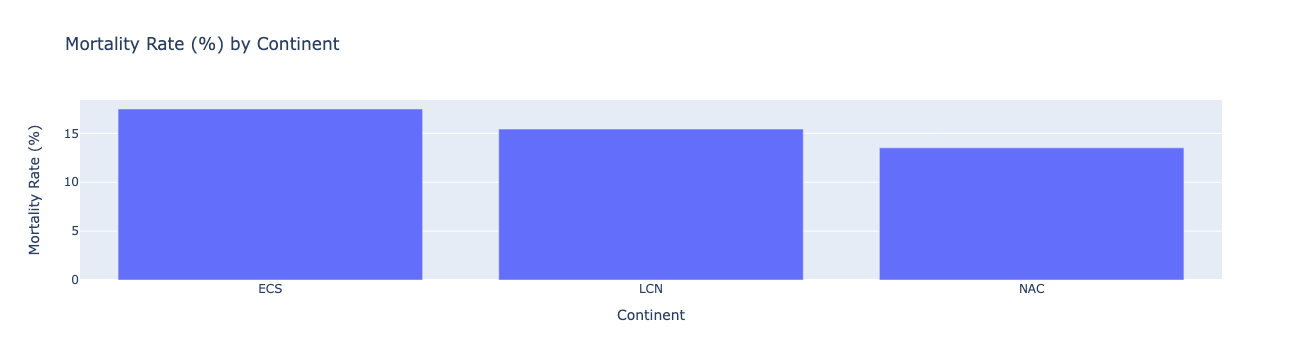

In [50]:
fig = px.bar(clean_wb_data, x = clean_wb_data.country_code, y = clean_wb_data.mortality_rate,
             labels = {'country_code': 'Continent',
                       'mortality_rate': 'Mortality Rate (%)'},
             title='Mortality Rate (%) by Continent'
            )
fig.show()

Text(0, 0.5, 'Nutrition Program Implementation')

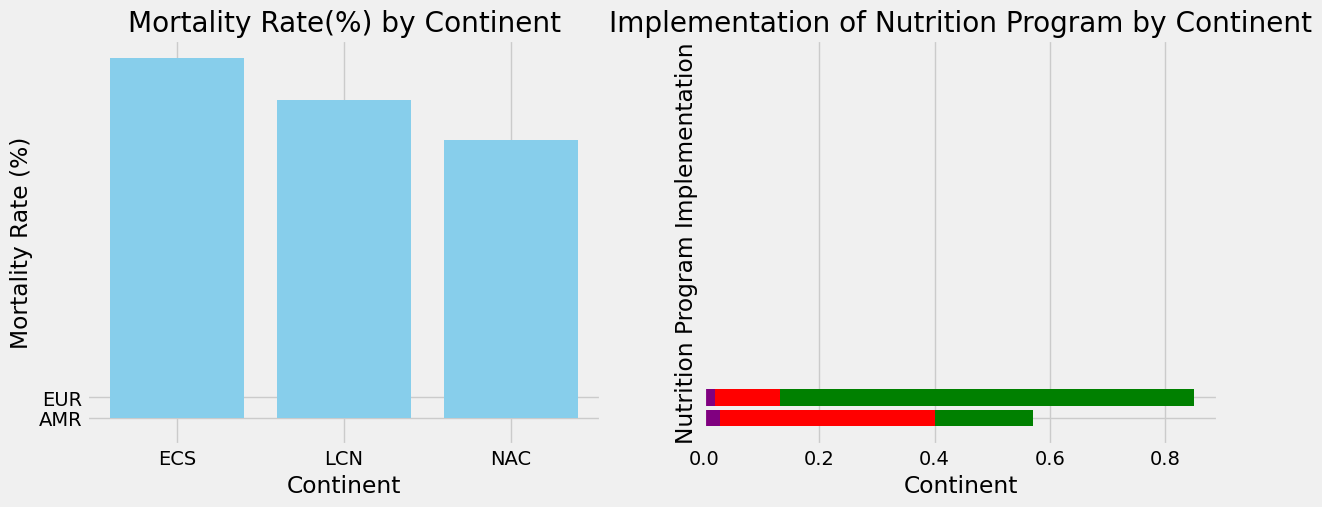

In [96]:
fig, axes = plt.subplots(1, 2, figsize = (13,5), sharey=True)

axes[0].bar(clean_wb_data['country_code'], clean_wb_data['mortality_rate'], color='skyblue')
axes[0].set_title('Mortality Rate(%) by Continent')
axes[0].set_xlabel('Continent')
axes[0].set_ylabel('Mortality Rate (%)')

continent = nutrition_and_location.index
yes_values = nutrition_and_location['Yes']
no_values = nutrition_and_location['No']
dont_know = nutrition_and_location["Don't know"]


axes[1].barh(continent, yes_values, color='green', label='Yes')
axes[1].barh(continent, no_values, color='red', label='No')
axes[1].barh(continent, dont_know, color='purple', label="Don't know")
axes[1].set_title('Implementation of Nutrition Program by Continent')
axes[1].set_xlabel('Continent')
axes[1].set_ylabel('Nutrition Program Implementation')

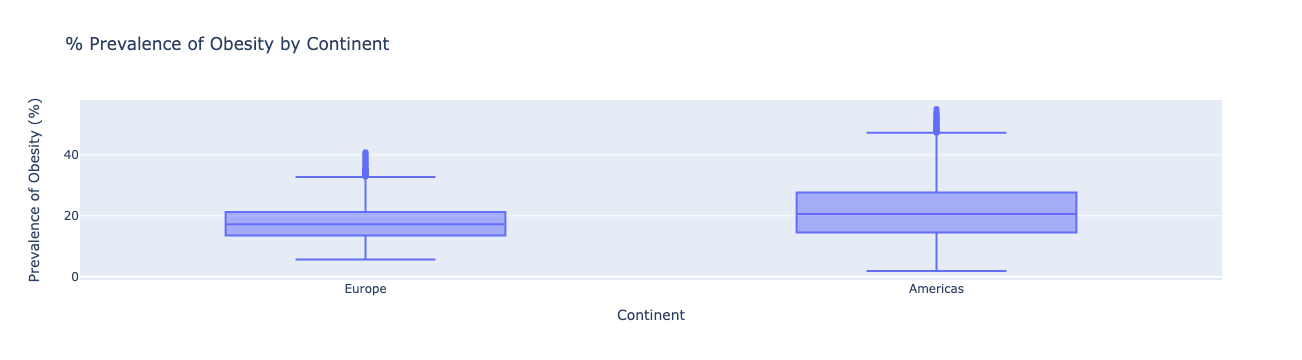

In [144]:
fig = px.box(who_obesity_data, x = 'ParentLocation', y = 'NumericValue',
            title = "% Prevalence of Obesity by Continent",
             labels = {"ParentLocation": "Continent", "NumericValue": "Prevalence of Obesity (%)"}
            )
fig.show()

## Analysis

Out of all the countries in Europe and the Americas, 65 countries had a national nutrition program while 21 did not. This came out to be about 74% of all countries in the two regions. 85% of countries in Europe had a national nutrition program, which is greater than the Americas with 57% of countries. In regards to mortality rates, it is difficult to tell which region had a higher mortality rate when comparing the Americas versus Europe because the World Bank data included Latin America as a separate region from North America while the WHO combined the regions into one. It would be inaccurate to simply add the mortality rates of Latin America and North America because the rate is not a raw-count of deaths. Instead, a weighted average that considers the population sizes of each region may be needed. Further data collection would be needed to make an accurate observation. However, if Latin America is not combined with North America, the World Bank data shows that Europe had a higher mortality rate than Latin America and North America. Europe's mortality rate was 17% while North America had the lowest value of 13%. Lastly, when looking at the obesity prevalence rate, the Americas had higher median, Q3, upper fence, and max values than Europe. Hence, the prevalence of obesity is generally higher in the Americas compared to Europe. With this information, there could be some relationship between nutrition programs and obesity, but more research is needed to see if there were other factors that contributed to the obesity prevalence and how that might affect NCDs.  

## Conclusion

In my project, I sought to observe the relationships between nutrition, obesity, and NCDs in the Americas (North and South) versus in Europe. I wanted to see whether there was a relationship between implementation of a national awareness or public education campaign on nutrition and rates of non-communicable diseases across the Americas versus in Europe. I also wanted to observe whether there was a relationship between implementation of nutrition programs and prevalence of obesity, which is a major risk factor for NCDs. To analyze these relationships, I gathered data from the WHO and World Bank. Overall, Europe had more widespread implementation of national nutrition education and campaigns compared to the Americas. The Americas generally had a higher prevalence of obesity than Europe. Given that Europe had more nutrition programs and a generally lower prevalence of obesity, there may be a relationship between nutrition programs and obesity, but more research would be needed. The relationship between mortality rates from NCDs and nutrition were difficult to see. Mortality rates could not accurately be compared, so further investigation is needed. For the next steps, more data would need to be collected or researched to find the mortality rate in the Americas as a whole in order to compare with Europe. It would also be important to continue to explore and evaluate the quality of the nutrition programs.  